In [ ]:
import pandas as pd
import random
import numpy as np

In [ ]:
df = pd.read_csv('/kaggle/input/enron-dataset/enron.csv')
rows_to_remove = df[df['Unnamed: 0'].str.contains('TOTAL')].index
df = df.drop(rows_to_remove)
df = df.drop(['Unnamed: 0','email_address'], axis=1)

poi = df[df.loc[:,'poi']==True]#.fillna(0)
not_poi = pd.DataFrame(df[df.loc[:,'poi']==False])#.fillna(0)

In [ ]:
def make_new_records(df, records_num):
    new_df = pd.DataFrame()
    for i in range(records_num):
        sample_times = random.randint(2,4)
        sample_idx = random.sample(range(0,len(df.index)), sample_times)
        sampled_df = df.iloc[[idx for idx in sample_idx]]
        numeric_cols = sampled_df.select_dtypes(include=np.number)
        avg_row = numeric_cols.mean()
        avg_row['poi'] = sampled_df.loc[sampled_df.index[0],'poi']
        new_df = pd.concat([new_df, avg_row.to_frame().T], ignore_index=True)
    return new_df
def create_new_dataset(poi_df, not_poi_df, poi_num=20, not_poi_num=40):
    new_poi = make_new_records(poi_df, poi_num)
    new_not_poi = make_new_records(not_poi_df, not_poi_num)
    return pd.concat([new_poi, new_not_poi], axis=0, ignore_index=True)

In [ ]:
dataset = create_new_dataset(poi, not_poi, 60, 450)
dataset

In [ ]:
dataset.to_csv('/kaggle/working/new_records.csv')

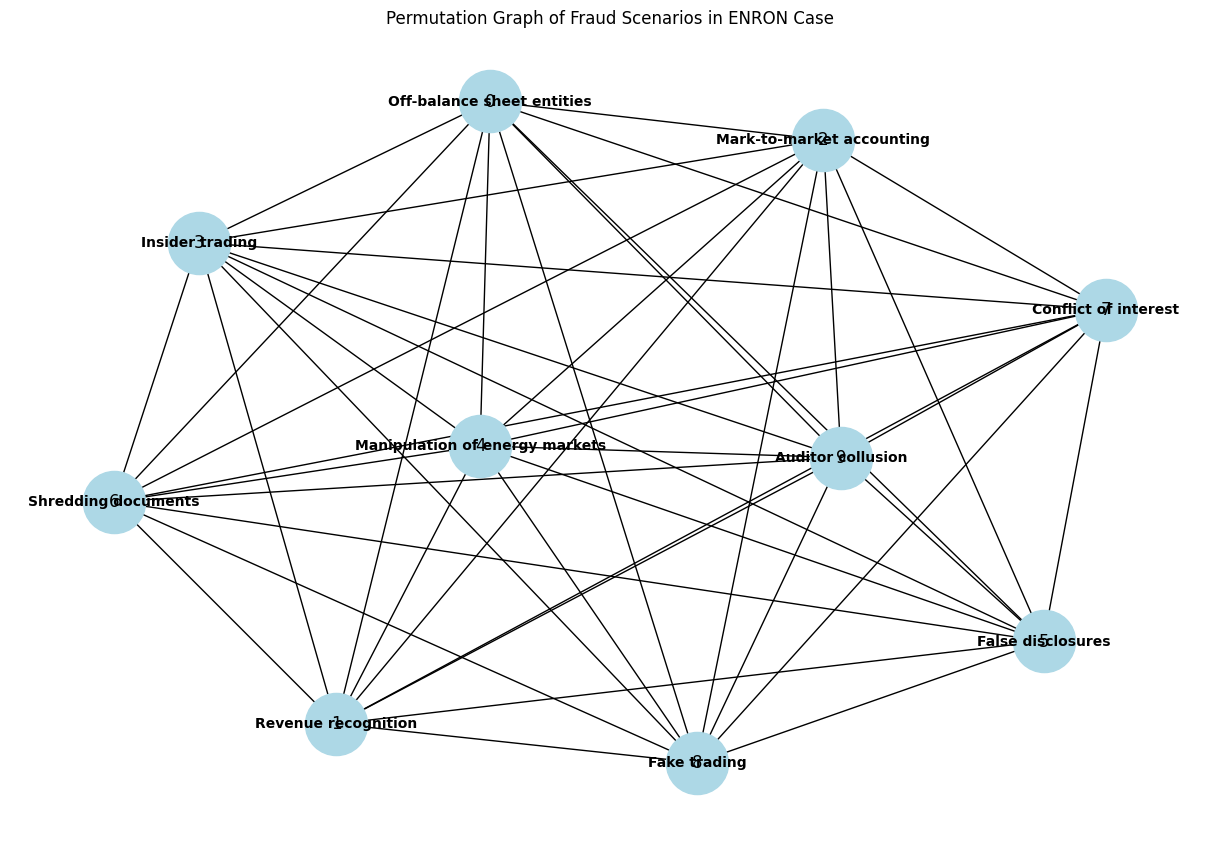

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

fraud_scenarios = [
    "Off-balance sheet entities",
    "Revenue recognition",
    "Mark-to-market accounting",
    "Insider trading",
    "Manipulation of energy markets",
    "False disclosures",
    "Shredding documents",
    "Conflict of interest",
    "Fake trading",
    "Auditor collusion"
]

# Create a complete graph with fraud scenarios as nodes
G = nx.complete_graph(len(fraud_scenarios))

# Set fraud scenarios as node labels
labels = {i: scenario for i, scenario in enumerate(fraud_scenarios)}

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold')
plt.title("Permutation Graph of Fraud Scenarios in ENRON Case")
plt.axis("off")
plt.show()